В данном кейсе вы попробуете себя в роли аналитика, специализирующегося на рынке недвижимости. Аналитики в крупных компаниях, занимающихся вложениями в недвижимость, анализируют тренды на рынке, временные ряды цен на недвижимость, строят диапазоны прогнозных цен.
Вы работаете в инвестиционной компании, которая планирует выпустить паи и купить на привлеченные средства пайщиков сто домов для последующей сдачи в аренду.

Однако ваша компания работает в стране A с жестким законодательством, которое защищает пайщиков. Если стоимость приобретенного портфеля домов упадет ниже определенного порога, компании придется вложить дополнительные собственные средства.

**Вам нужно:**

-Построить 99-процентный доверительный интервал для средних цен домов (house).

-Сделать прогноз цены средней цены домов (house) на 12 месяцев

**Дополнительные условия:**

-Доверительный интервал вы будете строить по историческим данным.

-Район с почтовым индексом 2604 не следует рассматривать, так как он находится в подтопляемой зоне города. Компания не планирует приобретать в нем недвижимость.






---


*1. Импортируем библиотеки и файл с данными*


---





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Python-2-Case-2-without-expert.csv')

In [ ]:
df.head(4)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607.0,525000,house,4
1,2007-02-27 00:00:00,2906.0,290000,house,3
2,2007-03-07 00:00:00,2905.0,328000,house,3
3,2007-03-09 00:00:00,2905.0,380000,house,4




---


*2. Пропуски*

---



In [ ]:
df.isnull().sum()

datesold        0
postcode        4
price           0
propertyType    0
bedrooms        0
dtype: int64

In [ ]:
df['postcode'] = df['postcode'].fillna(0)

In [ ]:
df['postcode'].isnull().sum()

0



---
3. Дубликаты
---



In [ ]:
df.duplicated().sum()

9

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0



---
4. В каком районе (postcode) продается больше всего объектов?


---



In [ ]:
df.groupby('postcode').count()

,datesold,price,propertyType,bedrooms
postcode,,,,
0.0,4,4,4,4
2600.0,634,634,634,634
2601.0,260,260,260,260
2602.0,2602,2602,2602,2602
2603.0,805,805,805,805
2604.0,1058,1058,1058,1058
2605.0,771,771,771,771
2606.0,659,659,659,659
2607.0,963,963,963,963


**Ответ:** в районе 2615.0.



---

*5. Приведите данные из столбца datesold из текстового формата в формат даты с помощью pd.to_datetime, лямбда_функции и df.apply.*


---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29580 entries, 0 to 29588
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datesold      29580 non-null  object 
 1   postcode      29580 non-null  float64
 2   price         29580 non-null  int64  
 3   propertyType  29580 non-null  object 
 4   bedrooms      29580 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
df['datesold'] = pd.to_datetime(df['datesold'])

In [ ]:
#df['datesold'] = df.apply(lambda row: pd.to_datetime(row ['datesold'], format = '%Y-%m-%d %H:%M:%S, axis=1)
#второй способ

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29580 entries, 0 to 29588
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  float64       
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
df.head(3)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607.0,525000,house,4
1,2007-02-27,2906.0,290000,house,3
2,2007-03-07,2905.0,328000,house,3




---
*6. Создайте отдельные датафреймы для каждого типа недвижимости (propertyType). Какое количество объектов в самом большом из двух получившихся датафреймов?*


---




In [ ]:
df_house = df[df['propertyType'] == 'house']

In [ ]:
df_unit = df[df['propertyType'] == 'unit']

In [ ]:
df_house.shape

(24552, 5)

In [ ]:
df_unit.shape

(5028, 5)



---
*7. Найдите основные характеристики с помощью методов дескриптивного анализа. Сравните результаты для всего датафрейма, датафрейма с домами и датафрейма с квартирами.*

*Укажите разницу между медианой стоимости квартир (unit) и домов (house). Ответ округлите до тысячных.*

---




In [ ]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2729.876944,6.097363e+05,3.250169
std,150.102371,2.817079e+05,0.951275
min,0.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [ ]:
df_house.describe()

,postcode,price,bedrooms
count,24552.000000,2.455200e+04,24552.000000
mean,2746.915567,6.479561e+05,3.539467
std,152.782798,2.853497e+05,0.710791
min,0.000000,5.650000e+04,0.000000
25%,2611.000000,4.750000e+05,3.000000
50%,2617.000000,5.850000e+05,4.000000
75%,2906.000000,7.391250e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [ ]:
df_unit.describe()

,postcode,price,bedrooms
count,5028.000000,5.028000e+03,5028.000000
mean,2646.676412,4.231066e+05,1.837510
std,101.136552,1.652806e+05,0.672611
min,2600.000000,8.500000e+04,0.000000
25%,2603.000000,3.230000e+05,1.000000
50%,2611.000000,3.900000e+05,2.000000
75%,2617.000000,4.766250e+05,2.000000
max,2914.000000,2.500000e+06,5.000000


In [ ]:
np.round(df_house['price'].median() - df_unit['price'].median(), 2)

195000.0



---
*8. Укажите значение коэффициента ассиметрии для стоимости недвижимости для всего датасета. Ответ округлить до двух знаков после запятой.*

---




In [ ]:
np.round(df['price'].skew(), 2)

4.31



---
*9. На основании значений среднего, медианы, коэффициента ассиметрии, коэффициента эксцесса можно ли отклонить гипотезу, что цена на объекты распределена нормально?*

---




In [ ]:
df['price'].mean()

609736.262204192

In [ ]:
df['price'].median()

550000.0

In [ ]:
df['price'].skew()

4.312009366902366

In [ ]:
df['price'].kurt()

54.723999302615496

**Ответ:** да, можно отклонить гипотезу, что цена распределена нормально. При нормальном распределении mean=median, skew=0, kurt=0.

---
*10. Постройте диаграмму, показывающую распределение цен в зависимости от даты продажи. В каком году продан самый дорогой дом (house)?*

---




In [ ]:
df_house.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607.0,525000,house,4
1,2007-02-27,2906.0,290000,house,3
2,2007-03-07,2905.0,328000,house,3
3,2007-03-09,2905.0,380000,house,4
4,2007-03-21,2906.0,310000,house,3


In [ ]:
df_house['year'] = df_house['datesold'].dt.year

<ipython-input-29-c37f66f93cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['year'] = df_house['datesold'].dt.year


Text(0, 0.5, 'Стоимость')

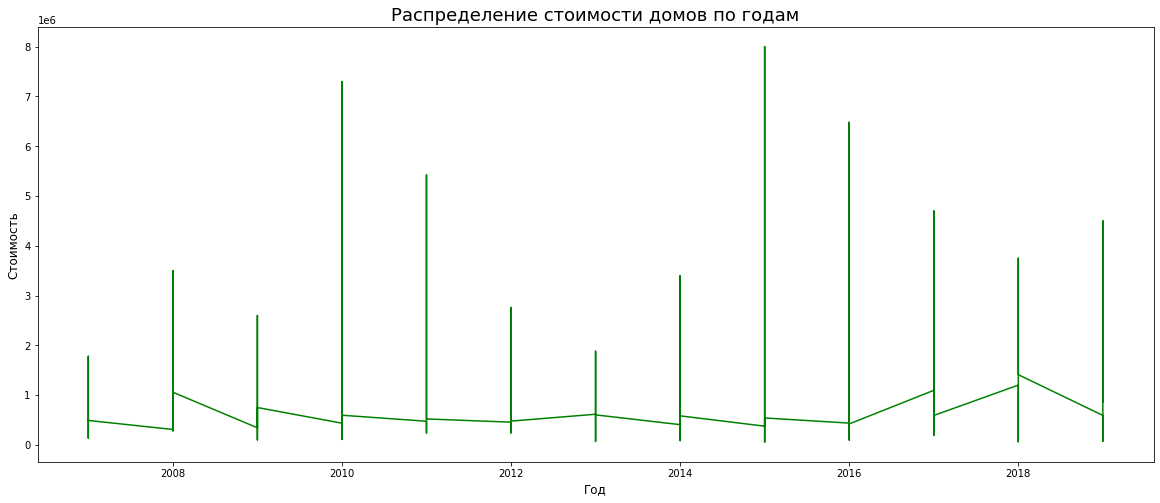

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_house['year'], df_house['price'], color='green')
plt.title('Распределение стоимости домов по годам', fontsize=18)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Стоимость', fontsize=12)

**Ответ:** самая высокая стоимость домов наблюдается в 2015 году.

---
*11. В каком году продана самая дорогая квартира (unit)?*

---

In [ ]:
df_unit.reset_index(inplace=True)

In [ ]:
df_unit.head(3)

,index,datesold,postcode,price,propertyType,bedrooms
0,24561,2007-06-27,2606.0,300000,unit,2
1,24562,2007-07-05,2611.0,300000,unit,2
2,24563,2007-07-19,2607.0,480000,unit,3


In [ ]:
df_unit['year'] = df_unit['datesold'].dt.year

<ipython-input-35-e5eff5478eb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unit['year'] = df_unit['datesold'].dt.year


In [ ]:
df_unit.head(3)

,index,datesold,postcode,price,propertyType,bedrooms,year
0,24561,2007-06-27,2606.0,300000,unit,2,2007
1,24562,2007-07-05,2611.0,300000,unit,2,2007
2,24563,2007-07-19,2607.0,480000,unit,3,2007


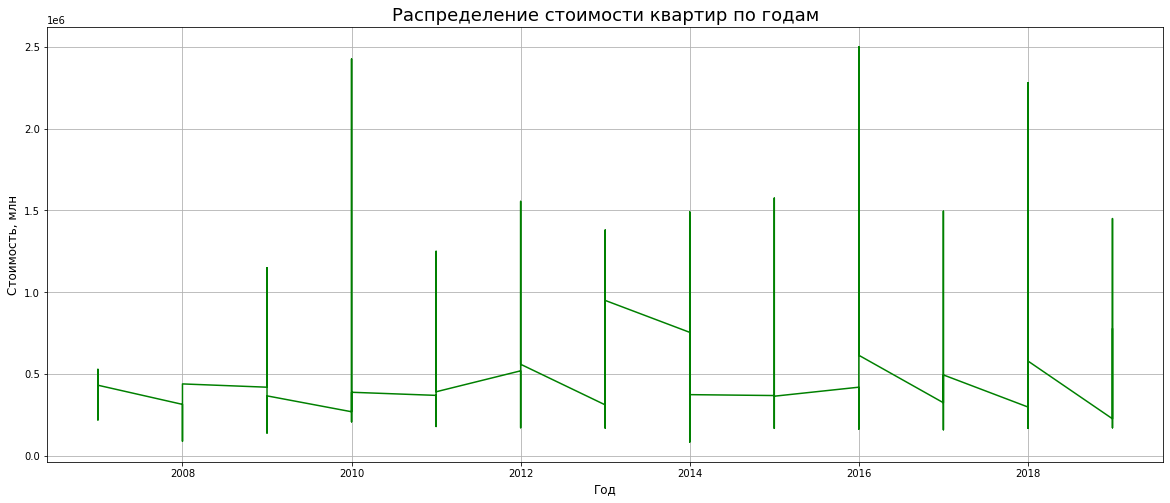

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_unit['year'], df_unit['price'], color='green')
plt.title('Распределение стоимости квартир по годам', fontsize=18)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Стоимость, млн', fontsize=12)
plt.grid(True)

**Ответ:**  самая высокая стоимость квартир наблюдается в 2016 году.


---
*12. Постройте гистограммы и box-plot и определите, в каком интервале лежит большая часть цен.*

---




Text(0, 0.5, 'Количество проданных объектов')

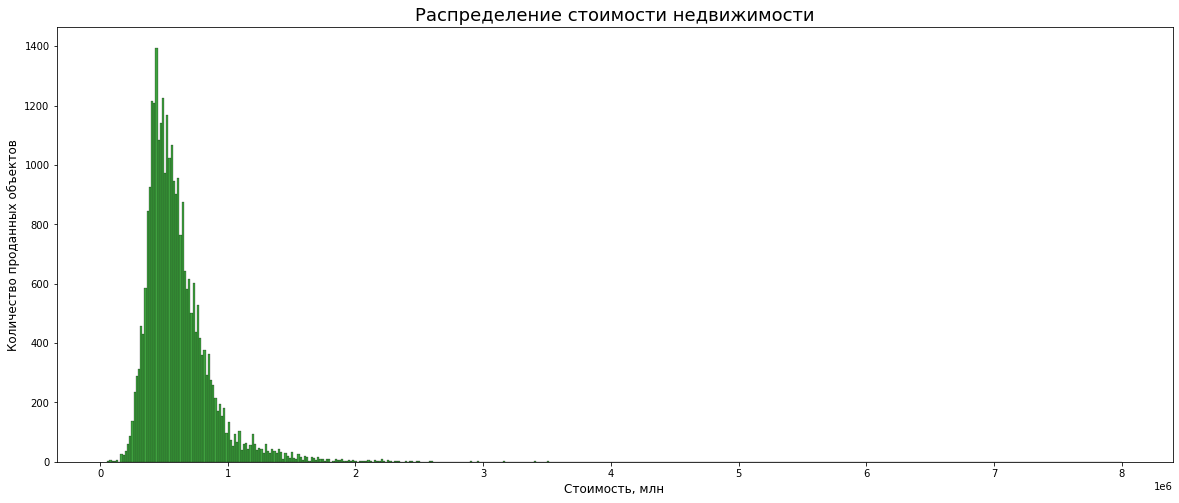

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(df['price'], color='green')
plt.title('Распределение стоимости недвижимости', fontsize=18)
plt.xlabel('Стоимость, млн', fontsize=12)
plt.ylabel('Количество проданных объектов', fontsize=12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


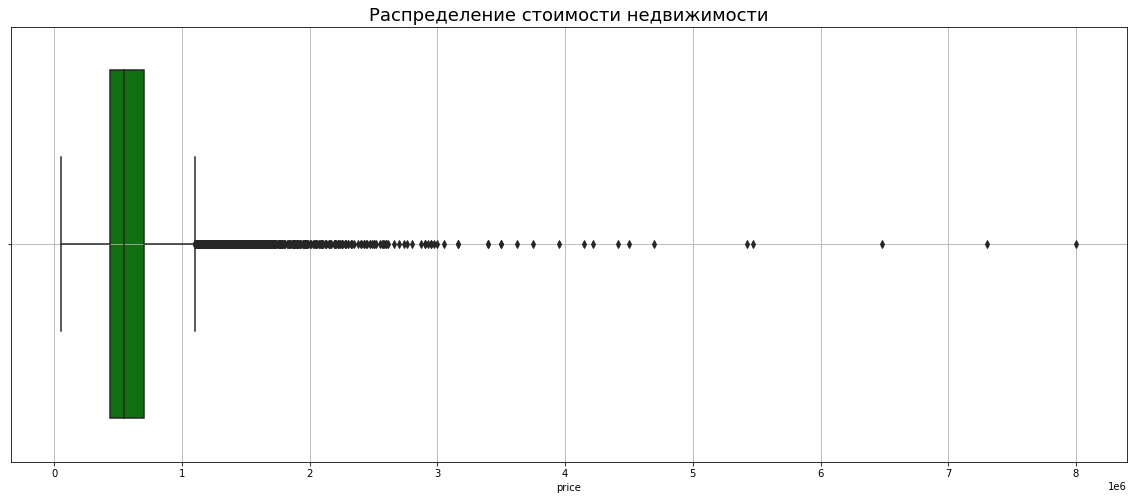

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(df['price'], color='green')
plt.title('Распределение стоимости недвижимости', fontsize=18)
plt.grid(True)

**Ответ:** в интервале до 1 млн.



---

*13. Укажите значение корреляции между количеством комнат и ценой. Округлите ответ до тысячных.*

---



In [ ]:
df.corr()

,postcode,price,bedrooms
postcode,1.000000,-0.147167,0.221252
price,-0.147167,1.000000,0.484212
bedrooms,0.221252,0.484212,1.000000


<AxesSubplot:>

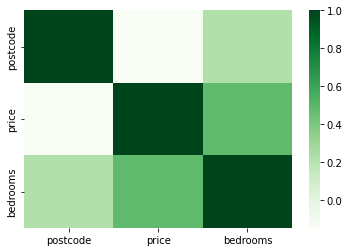

In [ ]:
sns.heatmap(df.corr(), cmap='Greens')

In [ ]:
print(np.round(0.484212, 2))

0.48




---

*14. Перейдем к работе с библиотекой Prophet. Вычислите среднюю цену на дома (house) во всех районах, кроме района с индексом 2604, в помесячной разбивке.*

*Проверьте распределение цен на нормальность. Выберите alpha=0.05. Можете ли вы на данном уровне значимости отклонить гипотезу, что данные распределены нормально?*

---



In [ ]:
df_house.head()

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607.0,525000,house,4,2007
1,2007-02-27,2906.0,290000,house,3,2007
2,2007-03-07,2905.0,328000,house,3,2007
3,2007-03-09,2905.0,380000,house,4,2007
4,2007-03-21,2906.0,310000,house,3,2007


In [ ]:
df_house_wo2604 = df_house[df_house['postcode'] != 2604.0] #создаём датасет, не учитывающий район с индексом 2604

In [ ]:
df_house_wo2604.reset_index(inplace=True)

In [ ]:
from scipy.stats import shapiro #используем тест Шапиро-Уилка для проверки распределения на нормальность

stat, p = shapiro(df_house_wo2604['price'].sample(n=5000))

In [ ]:
alpha = 0.05
if p > alpha:
  print('Не можем отклонить гипотезу, что данные распределены нормально')
else:
  print('Можем отклонить гипотезу, что данные распределены нормально')

print(p)

Можем отклонить гипотезу, что данные распределены нормально
0.0




---

*15. Постройте 99-процентный доверительный интервал для средней цены на дома. Формулу для расчёта выберите на основе результата теста на нормальность. Укажите значение нижней границы доверительного интервала, округленное до целого.*

---



Так как отклонили гипотезу о нормальности распределения цен на дома, используем формулу доверительного интервала для среднего при неизвестной дисперсии и/или распределении.

In [ ]:
from scipy import stats

In [ ]:
df_for_model = df_house_wo2604[['price', 'datesold']].resample('M', on = 'datesold')['price'].mean()

In [ ]:
df_for_model = df_for_model.to_frame()

In [ ]:
df_for_model = df_for_model.reset_index()

In [ ]:
alpha = 0.01
n = df_for_model['price'].count()
mu_hat = df_for_model['price']. mean()
std_hat = df_for_model['price'].std(ddof=1)
stats.t.interval(1 - alpha, df=(n-1), loc=mu_hat, scale=std_hat)

(377894.29625282215, 839232.0109801824)

**Ответ:** 377894



---


*15. Постройте прогноз. Укажите прогнозное значение средней цены домов (house) для 31 марта 2020 года. Ответ округлите до целого числа.*

---



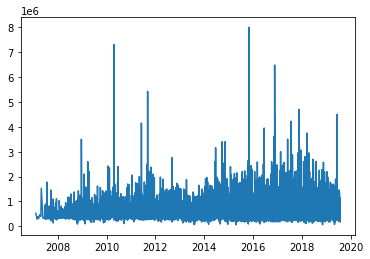

In [ ]:
plt.plot(df['datesold'],df['price'])

In [ ]:
from prophet import Prophet

In [ ]:
df_for_model = df_for_model.rename(columns={'datesold':'ds','price':'y'})
#позволяет рассчитать агрегированное значение (например, среднее) в разбивке по периодам (например, по месяцам).

In [ ]:
df_for_model.tail(3)

,ds,y
147,2019-05-31,704057.784431
148,2019-06-30,777167.525773
149,2019-07-31,652604.879121


In [ ]:
model = Prophet(yearly_seasonality=True)

In [ ]:
model.fit(df_for_model)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa0ppkr0e/lgzlg3tt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa0ppkr0e/cfa3q1b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74881', 'data', 'file=/tmp/tmpa0ppkr0e/lgzlg3tt.json', 'init=/tmp/tmpa0ppkr0e/cfa3q1b5.json', 'output', 'file=/tmp/tmpa0ppkr0e/prophet_modelqjfam3d1/prophet_model-20230305200401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:04:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:04:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
predictions_period = model.make_future_dataframe(periods=8, freq='M') #задаем дальность прогноза - 8 месяцев
predictions_period = predictions_period[-8:]

In [ ]:
forecast = model.predict(predictions_period)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-08-31,741835.214658,686616.433101,794566.553136
1,2019-09-30,778911.421516,728074.902188,833048.639261
2,2019-10-31,759186.085354,705901.549688,816415.213563
3,2019-11-30,783438.233386,730511.628073,841412.491513
4,2019-12-31,773466.821110,715083.410906,831746.339104
5,2020-01-31,746525.564036,690978.904810,804070.989205
6,2020-02-29,764718.814642,710267.941980,820347.858453
7,2020-03-31,797099.584182,742812.335989,851028.194672


In [ ]:
np.round(797099.584182, 0)

797100.0

**Ответ:** 797100 - прогнозируемое значение средней цены на 31 марта 2020 года.